In [1]:
from utils import img_util
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Grab path to current working directory
CWD_PATH = os.getcwd()
TEST_IMAGE_PATH = os.path.join(CWD_PATH, 'test_images')


# Grab path to current working directory
CWD_PATH = os.getcwd()

In [2]:
def imshow(image,title='title'):
    plt.title(title)
    plt.imshow(image)
    plt.show()

In [ ]:
# (9)00464.jpg width 4032, height 3024, otsu_value:  148.0
# (9)00947.jpg width 1440, height 1080,  otsu_value:  148.0

# (9)00427.jpg width 4896, height 3672, otsu_value: 115.0

# mxw1mjqs564unz5mxghs2w94dqf7p6jrhe4uk09e59_front.jpeg width 640, height 480, otsu_value: 121.0
# mxw1pu8d85en357dd6e8pmnnhpqcthrf2jzyl849gl_front.jpeg width 640, height 480, otsu_value: 152.0
# mxw14fw639anwz6gs93spea9cqsnghrw6t2l7qc7ze_front.jpeg width 640, height 400, otsu_value: 105.0
# mxw162nmd8dkxf96q34rs3h0mqg349zrmglmhpqkkv_front.jpeg width 640, height 480, otsu_value: 141.0

# mxw1ayndanzd4gru48q04ka3d86wg3sqp5qkj47kdm_front.jpeg width 640, height 400, otsu_value: 116.0

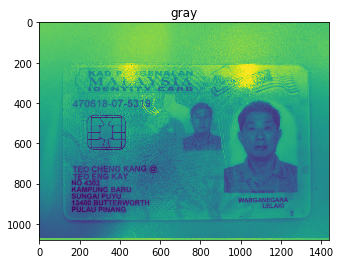

width 1440, height 1080, otsu_value: 148.0


In [138]:
img_file = os.path.join(TEST_IMAGE_PATH,'(9)00947.jpg')
img = cv2.imread(img_file)
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
imshow(gray, 'gray')
otsu_value = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)[0]
print('width {}, height {}, otsu_value: {}'.format(img.shape[1],img.shape[0], otsu_value))

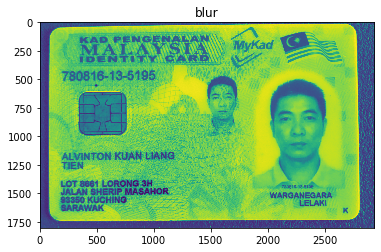

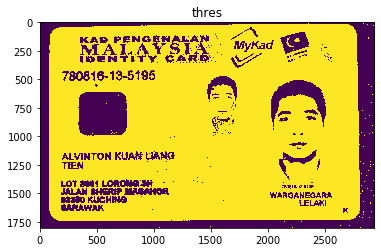

width 2731, height 1733


In [124]:
blur = cv2.bilateralFilter(gray, 5, 90, 90)
#blur = cv2.bilateralFilter(gray, 1, 21, 21)
imshow(blur,'blur')
thres = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
imshow(thres,'thres')
cnts, hierarchy = cv2.findContours(thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = max(cnts, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(cnt) 
cropped = img[y:y+h, x:x+w]
print('width {}, height {}'.format(cropped.shape[1],cropped.shape[0]))

scale  1


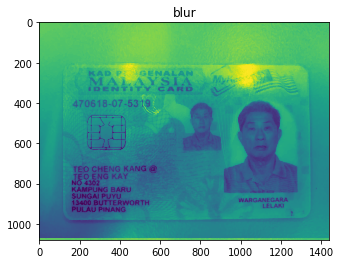

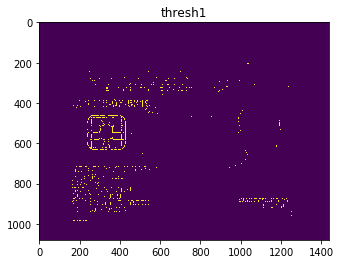

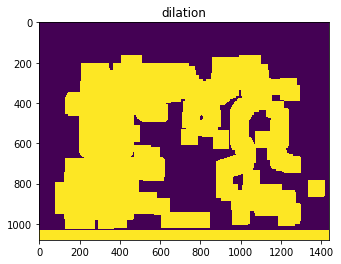

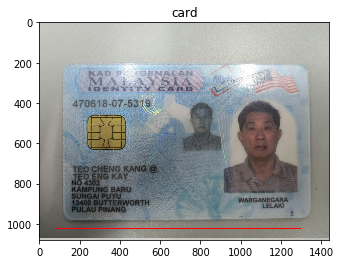

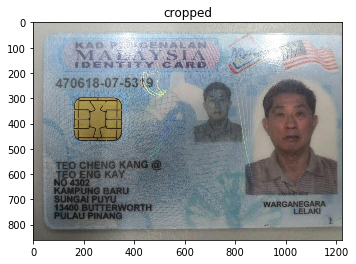

width 1223, height 861


In [139]:
iterations = 3
scale = gray.shape[1] // 860 if gray.shape[1] > 860 else 1
print('scale ',scale)
#resized = cv2.resize(gray,(860,540),cv2.INTER_AREA)
#blur image
blur = cv2.medianBlur(gray,7)
imshow(blur,'blur')
#cleaning noise
thresh1 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,11, 9)  
imshow(thresh1,'thresh1')
# Specify structure shape and kernel size.  
# Kernel size increases or decreases the area  
# of the rectangle to be detected. 
# A smaller value like (10, 10) will detect  
# each word instead of a sentence. 
# 21x21
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (29 * scale, 29 * scale)) 

# Appplying dilation on the threshold image 
dilation = cv2.dilate(thresh1, rect_kernel, iterations = iterations)     
imshow(dilation,'dilation')

# Finding dilation contours 
contours, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)     

cnt = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(cnt)
card = img.copy()
cv2.rectangle(card, (x, y), (x + w, y + h), (255, 0, 0), 2) 
imshow(card,'card')
cropped = img[y:y+h, x:x+w]
imshow(cropped,'cropped')
print('width {}, height {}'.format(cropped.shape[1],cropped.shape[0]))

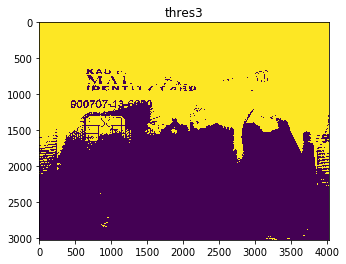

In [86]:
thres3 = cv2.threshold(blur, otsu_value, 200, cv2.THRESH_BINARY)[1]
imshow(thres3,'thres3')